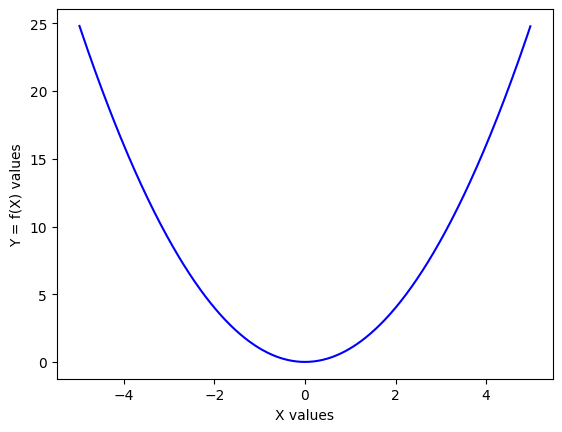

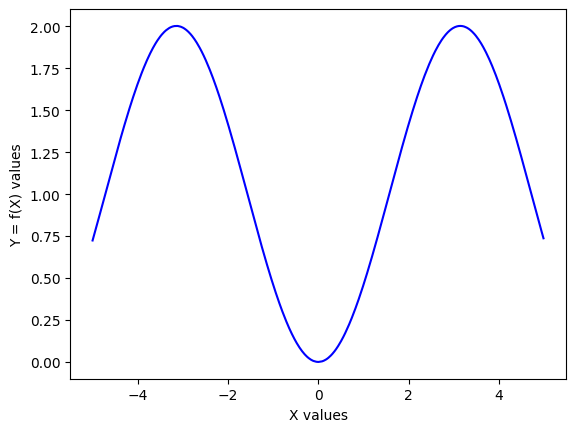

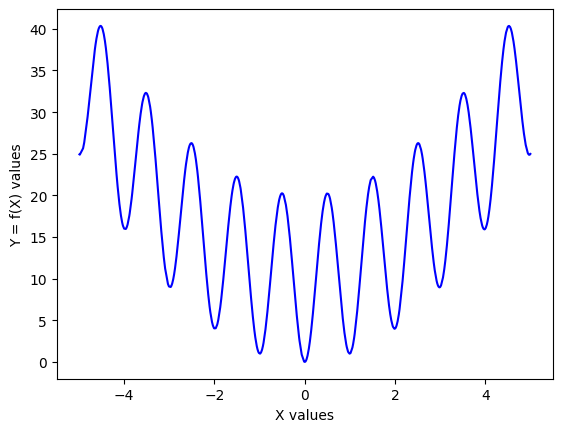

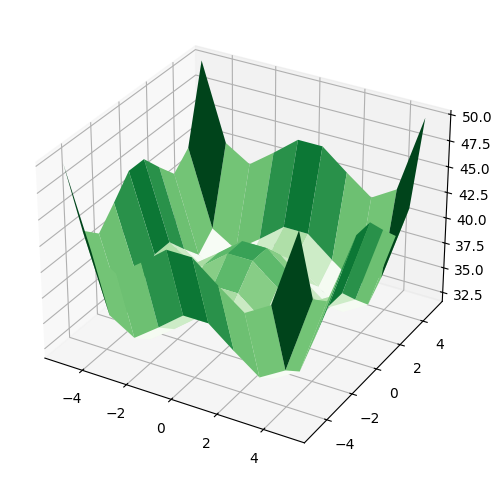

In [143]:
%run DataVizualisation.ipynb
%run Fitness.ipynb
%run OptimizationMethods.ipynb
import networkx as nx
import community.community_louvain as community_louvain
import scipy
import matplotlib.pyplot as plt

In [144]:
def create_graph(nodes, edges):
    G = nx.Graph()
    for node_label, node_data in nodes.items():
        G.add_node(node_label, **node_data)
    for source, target in edges:
        G.add_edge(source, target)
    return G

In [145]:
def read_edge_list_network(file_path):
    G = nx.Graph()
    with open(file_path, 'r') as file:
        lines = file.readlines()
    for line in lines:
        if not line.strip() or line.strip().startswith('%'):
            continue
        try:
            source, target = map(int, line.strip().split()[:2])  # Luați doar primele două valori
            G.add_edge(source, target)
        except ValueError:
            print(f"Ignorând linia: {line.strip()}. Nu poate fi parsată corect.")
            continue
    return G

In [146]:
def generateNewValue(lim1,lim2):
    return uniform(lim1,lim2)

In [147]:
def my_read_gml(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    nodes = {}
    edges = set()
    current_node = None
    source = None
    target = None

    for line in lines:
        line = line.strip()

        if line.startswith("node"):
            current_node = {}
        elif line.startswith("edge"):
            current_node = None
        elif line.startswith("id"):
            if current_node is not None:
                current_node['id'] = line.split()[1]
        elif line.startswith("label"):
            if current_node is not None:
                current_node['label'] = line.split()[1].strip('"')
        elif line.startswith("value"):
            if current_node is not None:
                value_str = line.split()[1].strip('"')
                try:
                    current_node['value'] = int(value_str)
                except ValueError:
                    current_node['value'] = value_str
        elif line.startswith("source"):
            source = line.split()[1]
        elif line.startswith("target"):
            target = line.split()[1]
            edges.add((source, target))
        elif line == "]":
            if current_node is not None:
                node_id = current_node.get('id')
                node_label = current_node.get('label', node_id)
                nodes[node_id] = current_node

    return nodes, edges

In [148]:
def read_gml(file):
    try:
        # Citește fișierul GML direct
        with open(file, 'r') as f:
            G = nx.parse_gml(f, label='id')
        print("Graph successfully read.")
        
        # Conversie la MultiGraph pentru a gestiona muchiile duplicate
        MG = nx.MultiGraph(G)
        
        # Asigură-te că fiecare nod are un atribut 'label' sau folosește 'id' ca 'label'
        for node in MG.nodes():
            if 'label' not in MG.nodes[node]:
                MG.nodes[node]['label'] = str(node)
        
        # Conversie înapoi la Graph pentru a elimina duplicatele
        G_unique = nx.Graph()
        for u, v, data in MG.edges(data=True):
            if not G_unique.has_edge(u, v):
                G_unique.add_edge(u, v, **data)
        
        return G_unique
    except Exception as e:
        print(f"Error reading GML file: {e}")
        raise

In [149]:
def read_and_create_graph(file_path, is_gml=True):
    if(is_gml):
        nodes, edges = my_read_gml(file_path)
        graph = create_graph(nodes, edges)
    else:
        graph = read_edge_list_network(file_path)
    return graph

In [150]:
def withTools(file, is_gml=True):
    # Citește fișierul GML
    G = read_and_create_graph(file, is_gml)
    
    # Detectează comunitățile folosind algoritmul Louvain
    partition = community_louvain.best_partition(G)
    
    # Afișează comunitățile
    print("Comunitățile detectate:")
    for node, community in partition.items():
        print(f"Node {node}: Community {community}")
    
    # Desenează rețeaua cu nodurile colorate în funcție de comunitatea lor
    pos = nx.spring_layout(G)
    colors = [partition[node] for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.get_cmap('viridis'), node_size=200)

    nx.draw_networkx_edges(G, pos, alpha=0.5, width=3)

    nx.draw_networkx_labels(G, pos, font_size=12)

    
    plt.show()

Comunitățile detectate:
Node 1: Community 0
Node 2: Community 0
Node 3: Community 0
Node 4: Community 0
Node 5: Community 3
Node 6: Community 3
Node 7: Community 3
Node 8: Community 0
Node 9: Community 1
Node 10: Community 0
Node 11: Community 3
Node 12: Community 0
Node 13: Community 0
Node 14: Community 0
Node 15: Community 1
Node 16: Community 1
Node 17: Community 3
Node 18: Community 0
Node 19: Community 1
Node 20: Community 0
Node 21: Community 1
Node 22: Community 0
Node 23: Community 1
Node 24: Community 1
Node 25: Community 2
Node 26: Community 2
Node 27: Community 1
Node 28: Community 1
Node 29: Community 2
Node 30: Community 1
Node 31: Community 1
Node 32: Community 2
Node 33: Community 1
Node 34: Community 1


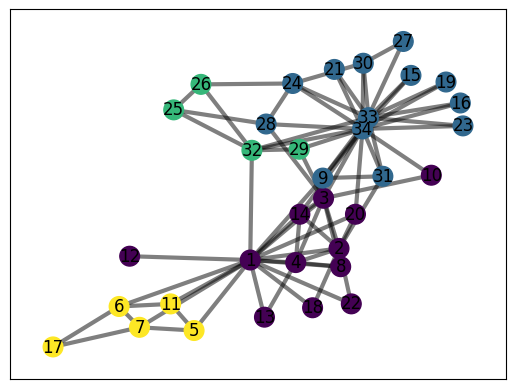

In [151]:
withTools('real_networks/karate/karate.gml')


Comunitățile detectate:
Node 0: Community 0
Node 1: Community 1
Node 2: Community 2
Node 3: Community 5
Node 4: Community 0
Node 5: Community 5
Node 6: Community 2
Node 7: Community 0
Node 8: Community 0
Node 9: Community 0
Node 10: Community 5
Node 11: Community 0
Node 12: Community 7
Node 13: Community 2
Node 14: Community 7
Node 15: Community 2
Node 16: Community 0
Node 17: Community 8
Node 18: Community 7
Node 19: Community 3
Node 20: Community 8
Node 21: Community 0
Node 22: Community 0
Node 23: Community 0
Node 24: Community 0
Node 25: Community 1
Node 26: Community 7
Node 27: Community 8
Node 28: Community 0
Node 29: Community 3
Node 30: Community 3
Node 31: Community 7
Node 32: Community 2
Node 33: Community 1
Node 34: Community 7
Node 35: Community 3
Node 36: Community 7
Node 37: Community 1
Node 38: Community 7
Node 39: Community 2
Node 40: Community 5
Node 41: Community 0
Node 42: Community 7
Node 43: Community 7
Node 44: Community 6
Node 45: Community 1
Node 46: Community 4

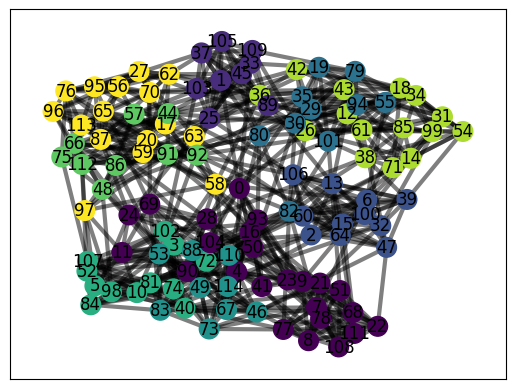

In [152]:
withTools('real_networks/football/football.gml')

Comunitățile detectate:
Node 0: Community 0
Node 1: Community 1
Node 2: Community 0
Node 3: Community 2
Node 4: Community 2
Node 5: Community 4
Node 6: Community 4
Node 7: Community 1
Node 8: Community 2
Node 9: Community 4
Node 10: Community 0
Node 11: Community 2
Node 12: Community 3
Node 13: Community 4
Node 14: Community 3
Node 15: Community 2
Node 16: Community 3
Node 17: Community 4
Node 18: Community 2
Node 19: Community 1
Node 20: Community 3
Node 21: Community 2
Node 22: Community 4
Node 23: Community 2
Node 24: Community 2
Node 25: Community 1
Node 26: Community 1
Node 27: Community 1
Node 28: Community 1
Node 29: Community 2
Node 30: Community 1
Node 31: Community 4
Node 32: Community 4
Node 33: Community 3
Node 34: Community 3
Node 35: Community 2
Node 36: Community 3
Node 37: Community 3
Node 38: Community 3
Node 39: Community 4
Node 40: Community 3
Node 41: Community 4
Node 42: Community 0
Node 43: Community 3
Node 44: Community 3
Node 45: Community 2
Node 46: Community 3

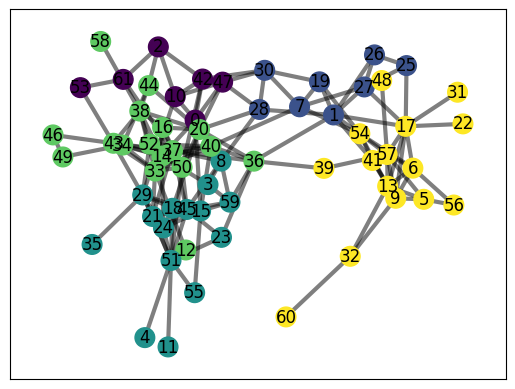

In [153]:
withTools('real_networks/dolphins/dolphins.gml')

Comunitățile detectate:
Node 0: Community 0
Node 1: Community 0
Node 2: Community 0
Node 3: Community 1
Node 4: Community 0
Node 5: Community 0
Node 6: Community 0
Node 7: Community 0
Node 8: Community 1
Node 9: Community 1
Node 10: Community 1
Node 11: Community 1
Node 12: Community 1
Node 13: Community 1
Node 14: Community 1
Node 15: Community 1
Node 16: Community 1
Node 17: Community 1
Node 18: Community 1
Node 19: Community 1
Node 20: Community 1
Node 21: Community 1
Node 22: Community 1
Node 23: Community 1
Node 24: Community 1
Node 25: Community 1
Node 26: Community 1
Node 27: Community 1
Node 28: Community 2
Node 29: Community 0
Node 30: Community 2
Node 31: Community 2
Node 32: Community 1
Node 33: Community 1
Node 34: Community 1
Node 35: Community 1
Node 36: Community 1
Node 37: Community 1
Node 38: Community 1
Node 39: Community 1
Node 40: Community 1
Node 41: Community 1
Node 42: Community 1
Node 43: Community 1
Node 44: Community 1
Node 45: Community 1
Node 46: Community 1

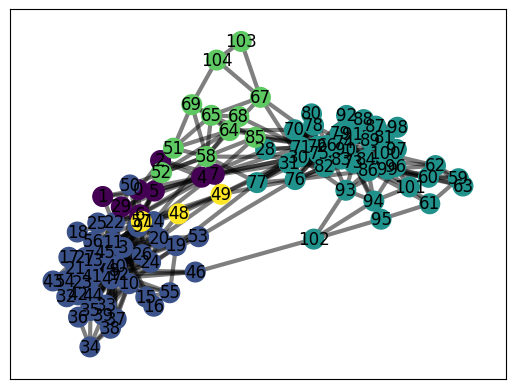

In [154]:
withTools('real_networks/krebs/krebs.gml')

In [155]:
#Mine

Comunitățile detectate:
Node 1: Community 1
Node 2: Community 1
Node 3: Community 0
Node 4: Community 1
Node 5: Community 1
Node 6: Community 1
Node 7: Community 1
Node 8: Community 1
Node 9: Community 1
Node 10: Community 1
Node 11: Community 1
Node 12: Community 0
Node 13: Community 0
Node 14: Community 0
Node 15: Community 0
Node 16: Community 0
Node 17: Community 0
Node 18: Community 1
Node 19: Community 0
Node 20: Community 1
Node 21: Community 0
Node 22: Community 1
Node 23: Community 1
Node 24: Community 1


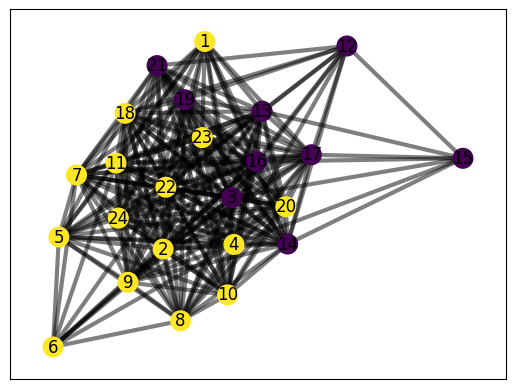

In [156]:

withTools('real_networks/mine/mammalia-raccoon-proximity.edges', False)


Comunitățile detectate:
Node 0: Community 0
Node 1: Community 0
Node 2: Community 1
Node 3: Community 0
Node 4: Community 1
Node 5: Community 0
Node 6: Community 2
Node 7: Community 0
Node 8: Community 0
Node 9: Community 3
Node 10: Community 4
Node 11: Community 4
Node 12: Community 5
Node 13: Community 1
Node 14: Community 1
Node 15: Community 4
Node 16: Community 6
Node 17: Community 17
Node 18: Community 1
Node 19: Community 8
Node 20: Community 14
Node 21: Community 14
Node 22: Community 14
Node 23: Community 10
Node 24: Community 14
Node 25: Community 11
Node 26: Community 14
Node 27: Community 14
Node 28: Community 14
Node 29: Community 4
Node 30: Community 14
Node 31: Community 14
Node 32: Community 13
Node 33: Community 6
Node 34: Community 14
Node 35: Community 14
Node 36: Community 14
Node 37: Community 14
Node 38: Community 14
Node 39: Community 14
Node 40: Community 15
Node 41: Community 6
Node 42: Community 16
Node 43: Community 10
Node 44: Community 14
Node 45: Community

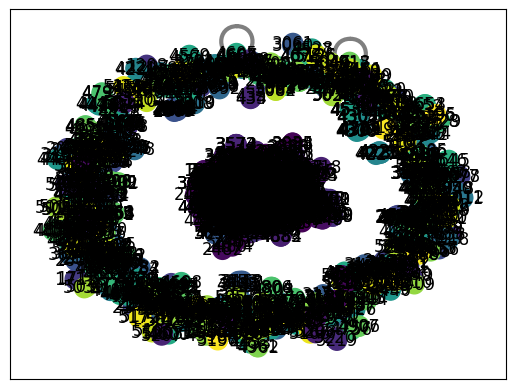

In [157]:
withTools('real_networks/mine/ca-GrQc.gml')

Comunitățile detectate:
Node 2: Community 0
Node 1: Community 0
Node 3: Community 0
Node 4: Community 0
Node 25: Community 0
Node 28: Community 0
Node 29: Community 0
Node 5: Community 3
Node 6: Community 3
Node 7: Community 3
Node 30: Community 0
Node 8: Community 3
Node 9: Community 3
Node 10: Community 3
Node 11: Community 3
Node 12: Community 3
Node 13: Community 3
Node 27: Community 3
Node 26: Community 1
Node 15: Community 1
Node 14: Community 1
Node 16: Community 1
Node 17: Community 1
Node 18: Community 1
Node 19: Community 1
Node 20: Community 1
Node 21: Community 2
Node 22: Community 2
Node 23: Community 2
Node 24: Community 2
Node 31: Community 2
Node 36: Community 2
Node 34: Community 2
Node 35: Community 2
Node 33: Community 2
Node 32: Community 2
Node 37: Community 2


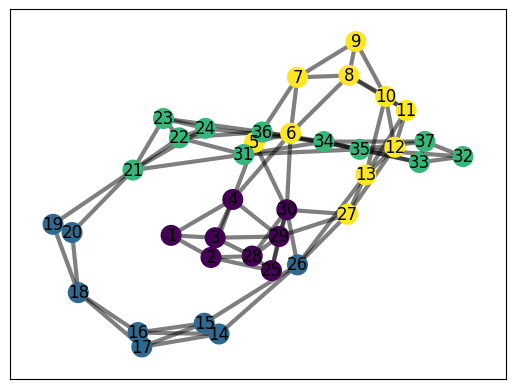

In [158]:
withTools('real_networks/mine/ENZYMES_g1.edges', False)

Comunitățile detectate:
Node 1: Community 0
Node 2: Community 0
Node 3: Community 0
Node 4: Community 0
Node 5: Community 0
Node 6: Community 0
Node 7: Community 1
Node 8: Community 2
Node 9: Community 3
Node 10: Community 2
Node 11: Community 2
Node 12: Community 2
Node 13: Community 2
Node 14: Community 2
Node 15: Community 2
Node 16: Community 1
Node 17: Community 2
Node 18: Community 2


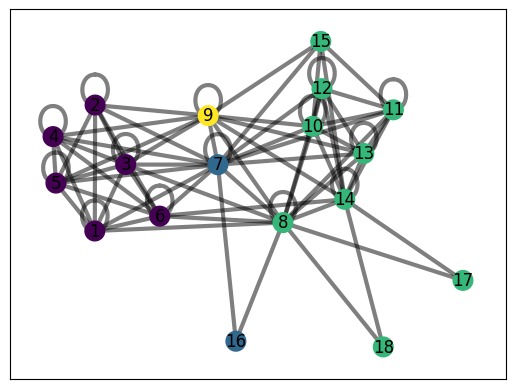

In [159]:
withTools('real_networks/mine/ia-southernwomen.edges', False)

Comunitățile detectate:
Node 52: Community 0
Node 1: Community 1
Node 2: Community 2
Node 3: Community 2
Node 4: Community 0
Node 5: Community 3
Node 8: Community 1
Node 9: Community 3
Node 10: Community 1
Node 11: Community 1
Node 12: Community 3
Node 13: Community 3
Node 15: Community 3
Node 23: Community 2
Node 25: Community 3
Node 26: Community 3
Node 27: Community 3
Node 30: Community 1
Node 31: Community 2
Node 33: Community 0
Node 34: Community 0
Node 38: Community 0
Node 40: Community 0
Node 42: Community 0
Node 45: Community 0
Node 46: Community 0
Node 47: Community 2
Node 48: Community 0
Node 37: Community 3
Node 53: Community 1
Node 41: Community 2
Node 43: Community 1
Node 44: Community 1
Node 49: Community 1
Node 50: Community 1
Node 51: Community 2
Node 54: Community 1
Node 6: Community 1
Node 7: Community 1
Node 14: Community 3
Node 16: Community 3
Node 17: Community 2
Node 18: Community 2
Node 19: Community 2
Node 20: Community 2
Node 21: Community 2
Node 22: Community 

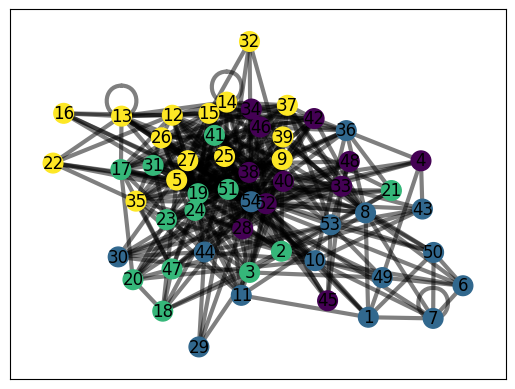

In [160]:
withTools('real_networks/mine/eco-stmarks.edges', False)

Comunitățile detectate:
Node 1: Community 0
Node 2: Community 1
Node 3: Community 0
Node 4: Community 0
Node 5: Community 1
Node 6: Community 1
Node 7: Community 1
Node 8: Community 1
Node 9: Community 1
Node 10: Community 1
Node 11: Community 1
Node 12: Community 0
Node 13: Community 0
Node 14: Community 0
Node 15: Community 0
Node 16: Community 0
Node 17: Community 0
Node 18: Community 0
Node 19: Community 1
Node 20: Community 1
Node 21: Community 0
Node 22: Community 1
Node 23: Community 1
Node 24: Community 1


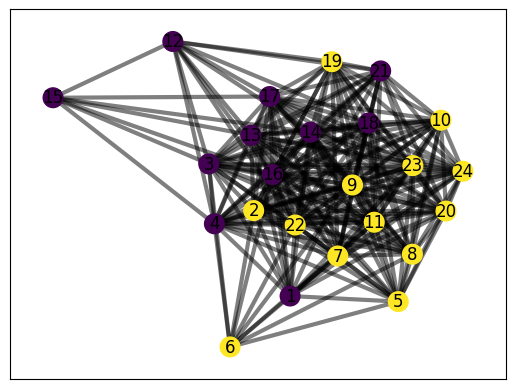

In [161]:
withTools('real_networks/mine/mammalia-raccoon-proximity.edges', False)

Comunitățile detectate:
Node 0: Community 0
Node 1: Community 0
Node 2: Community 1
Node 3: Community 0
Node 4: Community 1
Node 5: Community 2
Node 6: Community 3
Node 7: Community 0
Node 8: Community 0
Node 9: Community 2
Node 10: Community 0
Node 11: Community 3
Node 12: Community 4
Node 13: Community 0
Node 14: Community 2
Node 15: Community 0
Node 16: Community 0
Node 17: Community 1
Node 18: Community 5
Node 19: Community 0
Node 20: Community 1
Node 21: Community 4
Node 22: Community 6
Node 23: Community 0
Node 24: Community 0
Node 25: Community 0
Node 26: Community 7
Node 27: Community 2
Node 28: Community 2
Node 29: Community 3
Node 30: Community 0
Node 31: Community 0
Node 32: Community 8
Node 33: Community 0
Node 34: Community 3
Node 35: Community 3
Node 36: Community 9
Node 37: Community 0
Node 38: Community 0
Node 39: Community 0
Node 40: Community 2
Node 41: Community 0
Node 42: Community 3
Node 43: Community 0
Node 44: Community 0
Node 45: Community 5
Node 46: Community 9

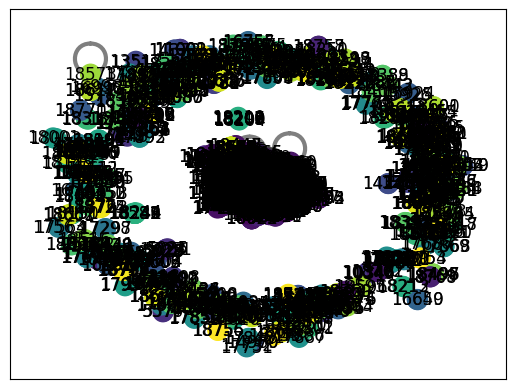

In [162]:
withTools('real_networks/mine/ca-AstroPh.gml')